In [1]:
'''
    Test the Word2VecEncoder build using python and gensim

    Requirements:
        -gensim  
        -regex
        -nltk
        
    Note: nlkt requires nltk.download() on first run to get stopwords and punkt tokenizer
'''
import numpy as np
import pandas as pd
from utils.Word2VecEncoder import Word2VecEncoder

'''
import nltk
import nltk.data
nltk.download()
'''

#Read in data, requires 'ISO-8859-1' encoding due to utf-8 encoding error
nhs = pd.read_csv("datasets/GP Prescribing - August 2017 (csv).csv", encoding = 'ISO-8859-1')

#Get categorical data attributes, only for VMP_NM, AMP_NM and Presentation
categoric_values = ['VMP_NM', 'AMP_NM', 'Presentation']

#Initialize word2vec class with downsampling true, set a small sample size of 5000 in this case
w2v = Word2VecEncoder(nhs, categoric_values, down_sample = True, sample_size =5000)

C:\Users\srder\Miniconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#Encode word2vec using default parameters
w2v.encode()

Processing training text
Training word2vec model.....


In [3]:
#Now to look at some info about the word2vec 
#First outputing what the vector space model considers similar words for some examples in its vocabulary
vocab = list(w2v.model.wv.vocab.keys())
print(vocab)

['mg', 'tablets', 'tablet', 'piece', 'ostomy', 'bag', 'cream', 'capsules', 'capsule', 'ointment', 'sodium', 'ml', 'oral', 'solution', 'sugar', 'free', 'budesonide', 'micrograms', 'dose', 'formoterol', 'dry', 'powder', 'inhaler', 'inhalation', 'oil', 'gastro', 'resistant', 'modified', 'release', 'hour', 'transdermal', 'patches', 'patch', 'generic', 'eye', 'drops', 'unit', 'preservative', 'fluticasone', 'suspension', 'liquid', 'spray', 'hydrocortisone', 'ear', 'carbonate', 'acid', 'gel', 'mouthwash', 'betamethasone', 'sterile', 'cm', 'x', 'dispersible', 'paraffin', 'bath', 'bromide', 'cfc', 'pressurised', 'chloride', 'xl', 'nan', 'microgram', 'dressing', 'wound', 'man', 'dress', 'salbutamol', 'gluten', 'bread', 'ensure', 'plus', 'gastroenteral', 'dermol', 'emollient', 'lymphoedema', 'ltd', 'estradiol', 'hours', 'colecalciferol', 'calcium', 'injection', 'pre', 'filled', 'syringes', 'skin', 'g', 'device', 'co', 'blood', 'glucose', 'biosensor', 'testing', 'strips', 'reagent', 'bags', 'lotio

In [4]:
#Take a couple of examples of words 
print("Word choices:")
print(vocab[4])
print(vocab[10])
print(vocab[2])
w2v.model.most_similar(positive=[vocab[4], vocab[10]], negative = [vocab[2]])

Word choices:
ostomy
sodium
tablet


[('units', 0.7099246382713318),
 ('lymphoedema', 0.6785213947296143),
 ('oil', 0.6070425510406494),
 ('insulin', 0.5883364081382751),
 ('bags', 0.5881557464599609),
 ('piece', 0.5747760534286499),
 ('bag', 0.5653741955757141),
 ('ltd', 0.5557059645652771),
 ('chloride', 0.5416399240493774),
 ('ear', 0.5290224552154541)]

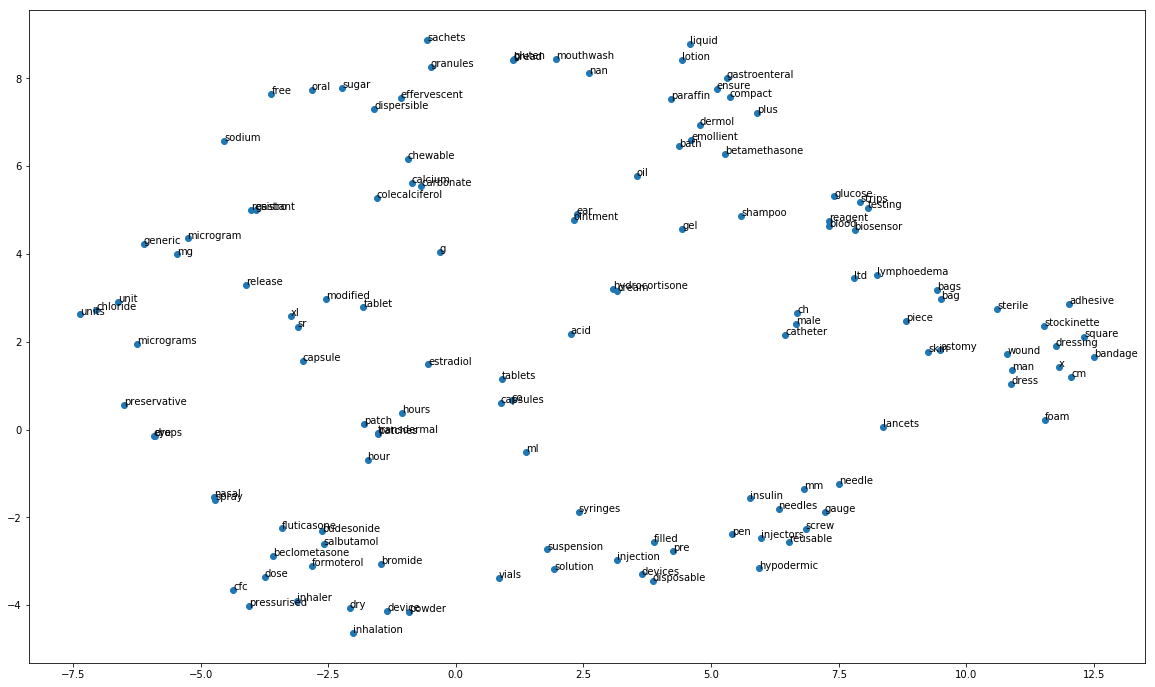

In [5]:
#Plot words in a scatterplot
import matplotlib.pyplot as plt

ax, fig  = w2v.plotWords()
plt.show()